__Exercício 1: Tratando séries temporais indexadas por tempo__

* Na instrução prática anterior foram utilizadas séries temporais de estações meteorológicas para extrair dados de diferentes anos e comparar as informações sobre temperaturas e e precipitações. Em uma das tarefas se solicitou para criar um ``MultiIndex`` para agregar os dois datasets em apenas um com as dimensões anos, messes do ano e dias do mês. Na tarefa seguinte foi construído um ``DateTimeIndex`` para as séries de dados. Com base no dataset indexado com o ``DateTimeIndex``. 
1. Analisando as colunas relacionadas e precipitações e temperaturas, mostre num subplot a evolução das temperaturas médias e acumulado de precipitações nos tres anos.
2. Prepare um gráfico que mostre como foi o acumulado de precipitações de Junho nos três anos.
3. Prepare um gráfico que mostre como foi a temperatura media de cada um dos dias de Março nos três anos.
4. Considere uma aproximação para as estações do ano no brasil dada por: Verão (Janeiro, Fevereiro e Março), Outono (Abril, Maio e Junho), Inverno (Julho, Agosto e Setembro) Primavera (Outubro, Novembro e Dezembro). Prepare um gráfico que mostre como se comportaram as temperaturas máxima e mínima de cada uma das estações nos tres anos. 
5. Repare que os dados de cada estação são monitorando de hora em hora. Considere os intervalos de um dia como sendo: Madrugada (00:00 a 06:00), Manha (06:00 a 12:00), Tarde (12:00 a 18:00) e Noite (18:00 a 00:00). Crie um gráfico que mostre com se comportou a temperatura  temperatura media o dia 28 de setembro  em cada um dos intervalos do dia dos três anos.

<img align="center" style="padding-right:10px;" src="Figuras/IP-01-fig_01.png">

# INSTRUÇÃO PRÁTICA - IP-P008
## PP - PROGRAMAÇÃO EM PYTHON
### OBJETIVOS DA ATIVIDADE

Revisar e consolidar o conteúdo de __Pandas__ avançado.

In [33]:
import pandas as pd

df2003 = pd.read_csv("INMET_CO_DF_A001_BRASILIA_01-01-2003_A_31-12-2003.CSV", encoding='iso-8859-1', decimal=',', delimiter=';', skiprows=8)
df2013 = pd.read_csv("INMET_CO_DF_A001_BRASILIA_01-01-2013_A_31-12-2013.CSV", encoding='iso-8859-1', decimal=',', delimiter=';', skiprows=8)
df2023 = pd.read_csv("INMET_CO_DF_A001_BRASILIA_01-01-2023_A_31-12-2023.CSV", encoding='iso-8859-1', decimal=',', delimiter=';', skiprows=8)

df2003.drop(["Unnamed: 19"], axis=1, inplace=True)
df2013 .drop(["Unnamed: 19"], axis=1, inplace=True)
df2023.drop(["Unnamed: 19"], axis=1, inplace=True)

df2023.rename(columns={'Data':'DATA (YYYY-MM-DD)', 'Hora UTC':'HORA (UTC)', 'RADIACAO GLOBAL (Kj/m²)': 'RADIACAO GLOBAL (KJ/m²)'}, inplace=True)

df = pd.concat([df2003,df2013,df2023])
df["HORA (UTC)"] = df["HORA (UTC)"].apply(lambda x: int(str(x)[0:2]))
data = df["DATA (YYYY-MM-DD)"].values
index = pd.DatetimeIndex(data, name="DATA")
df.drop("DATA (YYYY-MM-DD)", axis=1, inplace=True)
df.set_index(index, inplace=True)

In [34]:
df

,HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
DATA,,,,,,,,,,,,,,,,,,
2003-01-01,0,0.0,886.9,887.0,886.5,-9999.0,20.3,18.8,20.4,20.2,18.9,18.7,91.0,90.0,91.0,308.0,2.1,1.4
2003-01-01,1,0.0,887.3,887.3,886.9,-9999.0,19.9,18.5,20.3,19.9,18.8,18.5,92.0,91.0,92.0,302.0,2.2,1.3
2003-01-01,2,0.0,887.8,887.8,887.3,-9999.0,19.8,18.5,20.1,19.8,18.8,18.4,92.0,92.0,92.0,302.0,2.7,1.6
2003-01-01,3,0.0,886.9,887.8,886.9,-9999.0,19.5,18.5,19.8,19.5,18.6,18.4,94.0,92.0,94.0,295.0,3.4,2.0
2003-01-01,4,0.0,886.8,886.9,886.7,-9999.0,19.2,18.0,19.5,19.2,18.5,18.0,94.0,93.0,93.0,313.0,3.9,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,19,0.0,884.2,885.2,884.2,1252.2,26.1,18.4,28.1,26.0,19.0,16.9,64.0,52.0,63.0,1.0,5.3,2.1
2023-12-31,20,0.0,883.7,884.3,883.7,1178.8,27.7,18.1,27.7,25.8,18.2,16.9,62.0,53.0,56.0,314.0,5.2,1.9
2023-12-31,21,0.0,883.5,883.7,883.4,873.0,25.5,17.4,27.7,25.5,18.0,16.9,62.0,52.0,61.0,300.0,5.1,2.7


In [35]:
mi = []
for columns in df.columns:
    a = (columns,"")
    if(columns.find("PRESSAO")>-1 or columns.find("PRESSÃO")>-1):
        a = ("PRESSÃO",columns)
    if(columns.find("TEMPERATURA")>-1):
        a = ("TEMPERATURA",columns)
    if(columns.find("UMIDADE")>-1):
        a = ("UMIDADE",columns)
    if(columns.find("VENTO")>-1):
        a = ("VELOCIDADE DO VENTO",columns)
    mi.append(a)

df.columns = pd.MultiIndex.from_tuples(mi)
df

HORA (UTC) PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  \
                                                         
DATA                                                     
2003-01-01          0                              0.0   
2003-01-01          1                              0.0   
2003-01-01          2                              0.0   
2003-01-01          3                              0.0   
2003-01-01          4                              0.0   
...               ...                              ...   
2023-12-31         19                              0.0   
2023-12-31         20                              0.0   
2023-12-31         21                              0.0   
2023-12-31         22                              0.0   
2023-12-31         23                              0.0   

                                                         PRESSÃO  \
           PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)   
DATA                                                               
2003-01-01                                              886.9      
2003-01-01                                              887.3      
2003-01-01                                              887.8      
2003-01-01                                              886.9      
2003-01-01                                              886.8      
...                                                       ...      
2023-12-31                                              884.2      
2023-12-31                                              883.7      
2023-12-31                                              883.5      
2023-12-31                                              884.5      
2023-12-31                                              885.3      

                                                            \
           PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)   
DATA                                                         
2003-01-01                                           887.0   
2003-01-01                                           887.3   
2003-01-01                                           887.8   
2003-01-01                                           887.8   
2003-01-01                                           886.9   
...                                                    ...   
2023-12-31                                           885.2   
2023-12-31                                           884.3   
2023-12-31                                           883.7   
2023-12-31                                           884.5   
2023-12-31                                           885.3   

                                                             \
           PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)   
DATA                                                          
2003-01-01                                            886.5   
2003-01-01                                            886.9   
2003-01-01                                            887.3   
2003-01-01                                            886.9   
2003-01-01                                            886.7   
...                                                     ...   
2023-12-31                                            884.2   
2023-12-31                                            883.7   
2023-12-31                                            883.4   
2023-12-31                                            883.5   
2023-12-31                                            884.5   

           RADIACAO GLOBAL (KJ/m²)  \
                                     
DATA                                 
2003-01-01                 -9999.0   
2003-01-01                 -9999.0   
2003-01-01                 -9999.0   
2003-01-01                 -9999.0   
2003-01-01                 -9999.0   
...                            ...   
2023-12-31                  1252.2   
2023-12-31                  1178.8   
2023-12-31                   873.0   
2023-12-31                   104.0   

In [36]:
def mesParaEstacao(mes):
    if mes <= 3:
        return "VERÃO"
    if mes <=6:
        return "OUTONO"
    if mes<=9:
        return "INVERNO"
    return "PRIMAVERA"

estacao = [mesParaEstacao(data) for data in df.index.month]
df["ESTAÇÃO"] = estacao


In [37]:
def hrParaIntervalo(hr):
    if hr <= 6:
        return "MADRUGADA"
    if hr <= 12:
        return "MANHÃ"
    if hr <= 18:
        return "TARDE"
    return "NOITE"

df["INTERVALO"] = df["HORA (UTC)"].apply(hrParaIntervalo)

df

HORA (UTC) PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  \
                                                         
DATA                                                     
2003-01-01          0                              0.0   
2003-01-01          1                              0.0   
2003-01-01          2                              0.0   
2003-01-01          3                              0.0   
2003-01-01          4                              0.0   
...               ...                              ...   
2023-12-31         19                              0.0   
2023-12-31         20                              0.0   
2023-12-31         21                              0.0   
2023-12-31         22                              0.0   
2023-12-31         23                              0.0   

                                                         PRESSÃO  \
           PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)   
DATA                                                               
2003-01-01                                              886.9      
2003-01-01                                              887.3      
2003-01-01                                              887.8      
2003-01-01                                              886.9      
2003-01-01                                              886.8      
...                                                       ...      
2023-12-31                                              884.2      
2023-12-31                                              883.7      
2023-12-31                                              883.5      
2023-12-31                                              884.5      
2023-12-31                                              885.3      

                                                            \
           PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)   
DATA                                                         
2003-01-01                                           887.0   
2003-01-01                                           887.3   
2003-01-01                                           887.8   
2003-01-01                                           887.8   
2003-01-01                                           886.9   
...                                                    ...   
2023-12-31                                           885.2   
2023-12-31                                           884.3   
2023-12-31                                           883.7   
2023-12-31                                           884.5   
2023-12-31                                           885.3   

                                                             \
           PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)   
DATA                                                          
2003-01-01                                            886.5   
2003-01-01                                            886.9   
2003-01-01                                            887.3   
2003-01-01                                            886.9   
2003-01-01                                            886.7   
...                                                     ...   
2023-12-31                                            884.2   
2023-12-31                                            883.7   
2023-12-31                                            883.4   
2023-12-31                                            883.5   
2023-12-31                                            884.5   

           RADIACAO GLOBAL (KJ/m²)  \
                                     
DATA                                 
2003-01-01                 -9999.0   
2003-01-01                 -9999.0   
2003-01-01                 -9999.0   
2003-01-01                 -9999.0   
2003-01-01                 -9999.0   
...                            ...   
2023-12-31                  1252.2   
2023-12-31                  1178.8   
2023-12-31                   873.0   
2023-12-31                   104.0   

In [38]:
tempMedia = df.groupby([df.index.date])["TEMPERATURA"].mean()

tempMedia.index = pd.to_datetime(tempMedia.index)

precipAcum = df.groupby(df.index.year)["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"].cumsum()

tempMedia


TEMPERATURA  \
           TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)   
2003-01-01                                    21.091667   
2003-01-02                                    22.233333   
2003-01-03                                    21.658333   
2003-01-04                                    21.350000   
2003-01-05                                    21.879167   
...                                                 ...   
2023-12-27                                    22.979167   
2023-12-28                                    22.475000   
2023-12-29                                    24.095833   
2023-12-30                                    23.033333   
2023-12-31                                    22.025000   

                                                 \
           TEMPERATURA DO PONTO DE ORVALHO (°C)   
2003-01-01                            18.250000   
2003-01-02                            18.033333   
2003-01-03                            18.266667   
2003-01-04                            17.716667   
2003-01-05                            17.162500   
...                                         ...   
2023-12-27                            17.862500   
2023-12-28                            18.550000   
2023-12-29                            18.770833   
2023-12-30                            18.995833   
2023-12-31                            18.258333   

                                                       \
           TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)   
2003-01-01                                  21.733333   
2003-01-02                                  22.683333   
2003-01-03                                  22.279167   
2003-01-04                                  21.820833   
2003-01-05                                  22.433333   
...                                               ...   
2023-12-27                                  23.858333   
2023-12-28                                  23.595833   
2023-12-29                                  24.875000   
2023-12-30                                  23.841667   
2023-12-31                                  22.600000   

                                                       \
           TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)   
2003-01-01                                  20.600000   
2003-01-02                                  21.658333   
2003-01-03                                  21.112500   
2003-01-04                                  20.850000   
2003-01-05                                  21.404167   
...                                               ...   
2023-12-27                                  22.200000   
2023-12-28                                  21.608333   
2023-12-29                                  23.308333   
2023-12-30                                  22.358333   
2023-12-31                                  21.466667   

                                                             \
           TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)   
2003-01-01                                        18.733333   
2003-01-02                                        18.483333   
2003-01-03                                        18.708333   
2003-01-04                                        18.220833   
2003-01-05                                        17.683333   
...                                                     ...   
2023-12-27                                        18.550000   
2023-12-28                                        19.237500   
2023-12-29                                        19.375000   
2023-12-30                                        19.462500   
2023-12-31                                        18.791667   

                                                             
           TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)  
2003-01-01                                        17.929167  
2003-01-02                                        17.533333  
2003-01-03                                        17.754167 

In [39]:
import matplotlib.pyplot as plt

#### 1. Analisando as colunas relacionadas e precipitações e temperaturas, mostre num subplot a evolução das temperaturas médias e acumulado de precipitações nos tres anos.

In [40]:

anos = [2003,2013,2023]

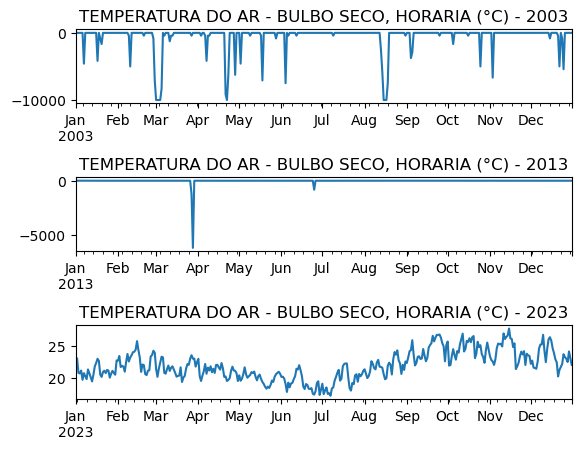

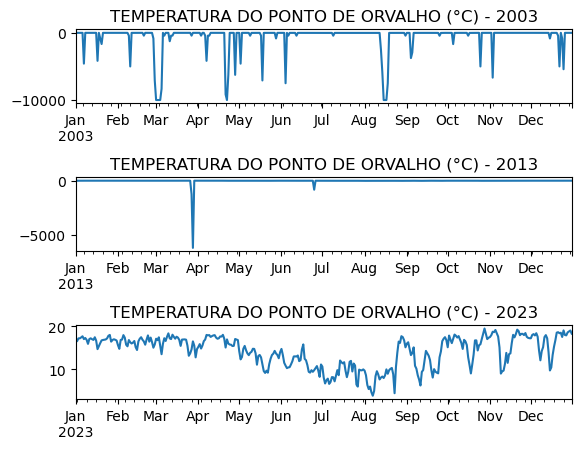

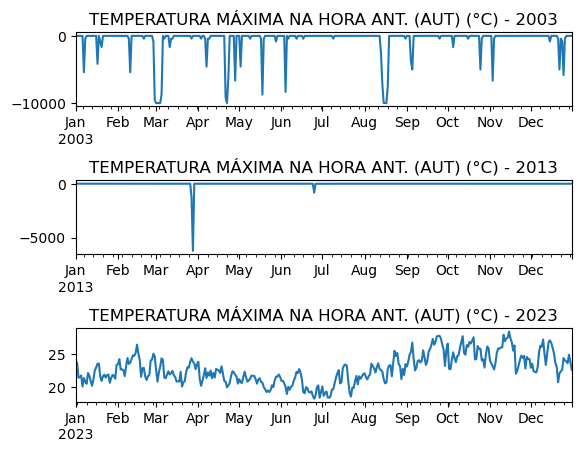

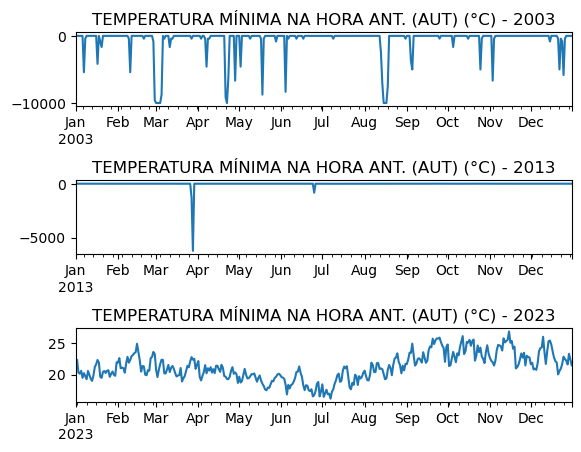

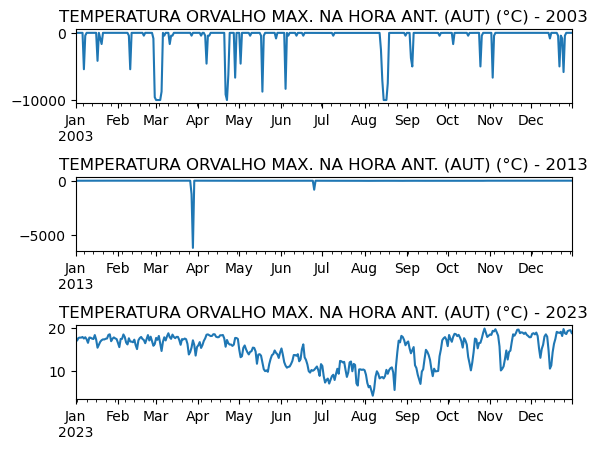

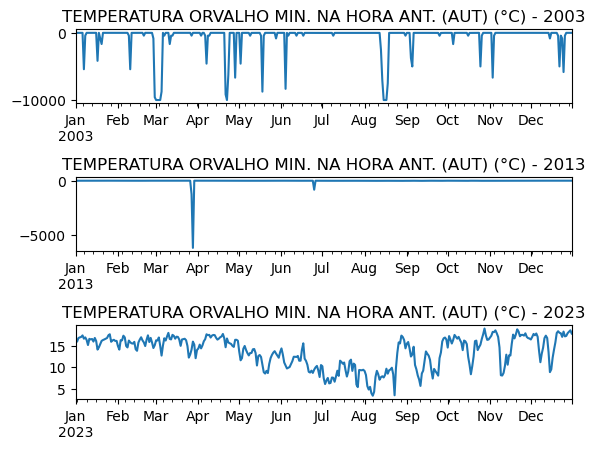

In [41]:


for j in tempMedia.columns.to_list():
    fig, ax = plt.subplots(nrows=3,ncols=1)
    for i,ano in enumerate(anos):
        tempMedia[tempMedia.index.year==ano][j].plot(ax=ax[i])
        ax[i].title.set_text(str(j[1])+" - "+str(ano))
    plt.subplots_adjust(wspace=1,hspace=1)


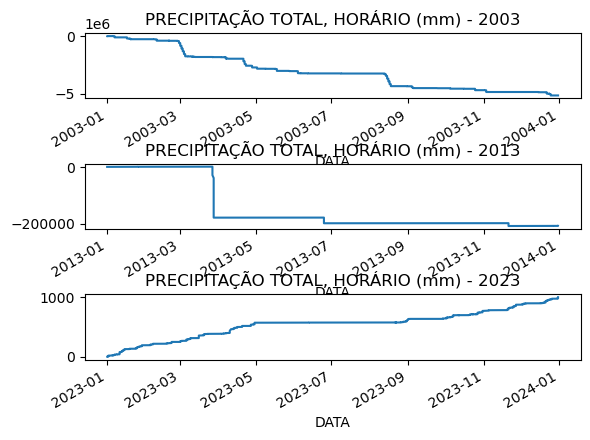

In [42]:

fig, ax = plt.subplots(nrows=3,ncols=1)

for i,ano in enumerate(anos):
    precipAcum[precipAcum.index.year==ano].plot(ax=ax[i])
    ax[i].title.set_text(precipAcum.name+" - "+str(ano))

plt.subplots_adjust(wspace=1,hspace=1)



### 2. Prepare um gráfico que mostre como foi o acumulado de precipitações de Junho nos três anos.


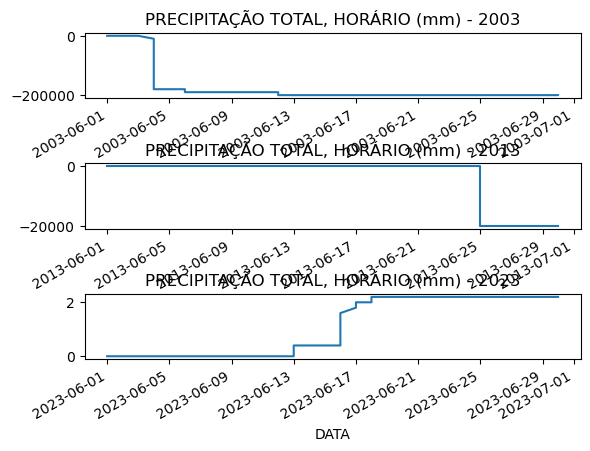

In [43]:
precipAcumJun = df[df.index.month==6]

precipAcumJun.index = pd.to_datetime(precipAcumJun.index)
precipAcumJun = precipAcumJun.groupby(precipAcumJun.index.year)["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"].cumsum()

fig, ax = plt.subplots(nrows=3,ncols=1)

for i,ano in enumerate(anos):
    precipAcumJun[precipAcumJun.index.year==ano].plot(ax=ax[i])
    ax[i].title.set_text(precipAcumJun.name+" - "+str(ano))

plt.subplots_adjust(wspace=1,hspace=1)


### 3. Prepare um gráfico que mostre como foi a temperatura media de cada um dos dias de Março nos três anos.

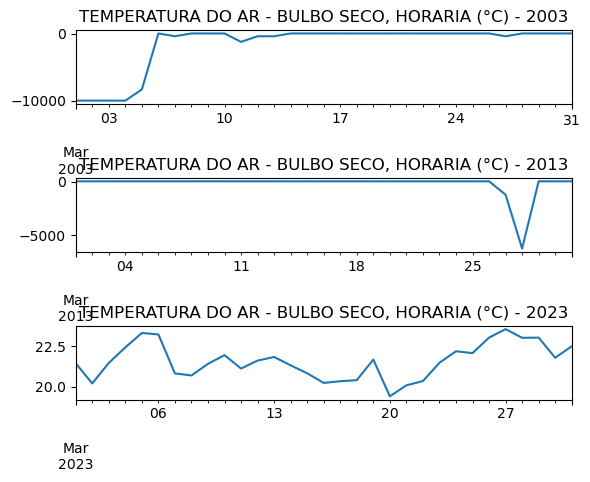

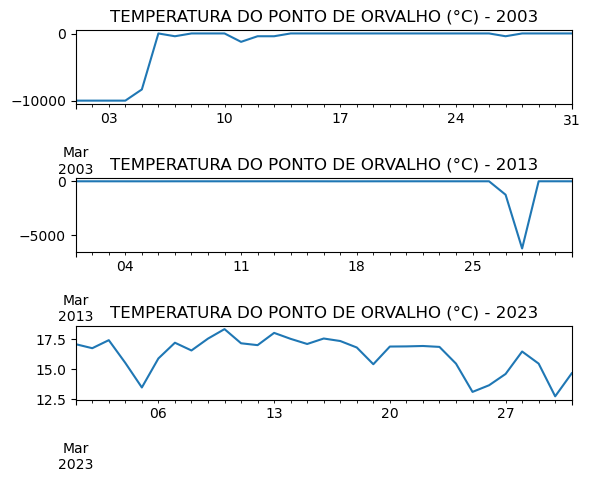

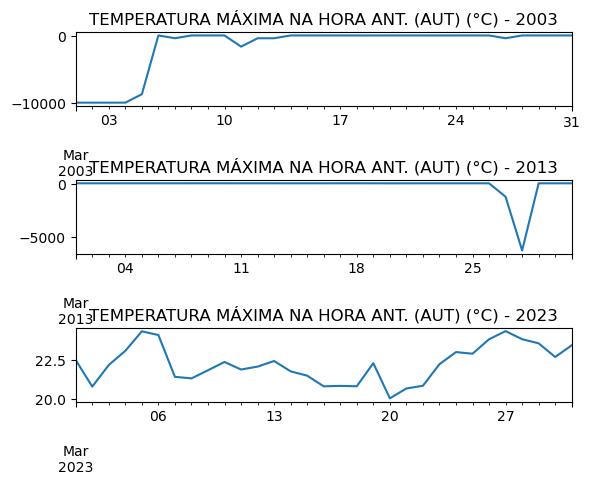

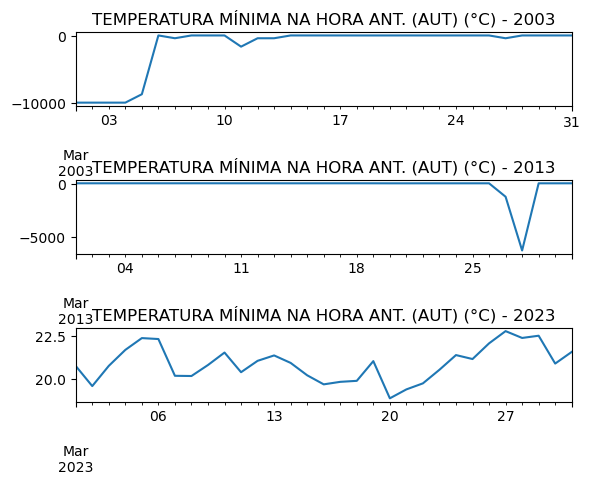

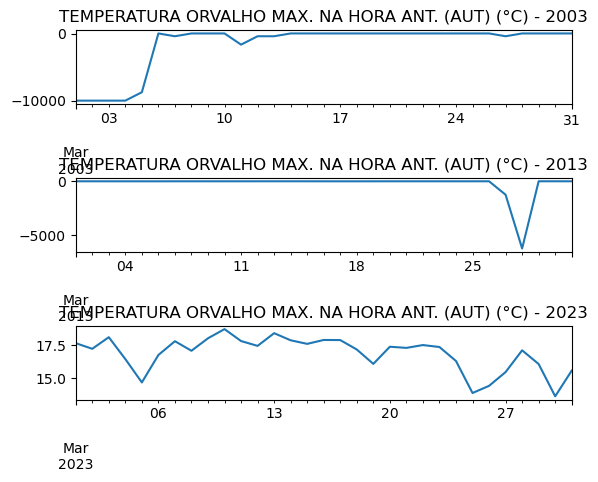

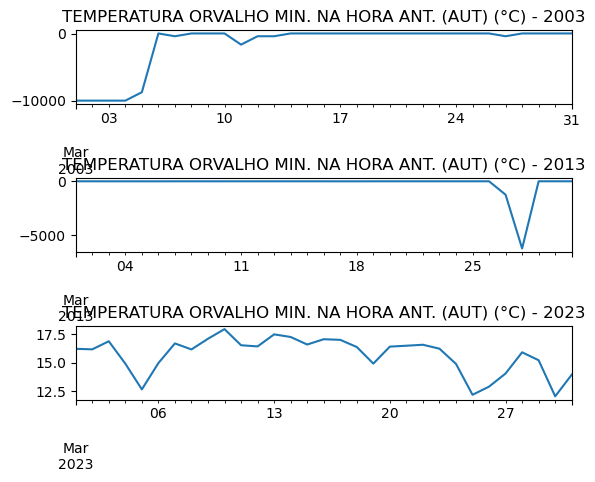

In [44]:
tempMediaMar = df[df.index.month==3]
tempMediaMar = tempMediaMar.groupby([tempMediaMar.index.date])["TEMPERATURA"].mean()

tempMediaMar.index = pd.to_datetime(tempMediaMar.index)

for j in tempMediaMar.columns.to_list():
    fig, ax = plt.subplots(nrows=3,ncols=1)
    for i,ano in enumerate(anos):
        tempMediaMar[tempMediaMar.index.year==ano][j].plot(ax=ax[i])
        ax[i].title.set_text(str(j[1])+" - "+str(ano))
    plt.subplots_adjust(wspace=1,hspace=1)

### 4. Considere uma aproximação para as estações do ano no brasil dada por: Verão (Janeiro, Fevereiro e Março), Outono (Abril, Maio e Junho), Inverno (Julho, Agosto e Setembro) Primavera (Outubro, Novembro e Dezembro). Prepare um gráfico que mostre como se comportaram as temperaturas máxima e mínima de cada uma das estações nos tres anos. 
5. Repare que os dados de cada estação são monitorando de hora em hora. Considere os intervalos de um dia como sendo: Madrugada (00:00 a 06:00), Manha (06:00 a 12:00), Tarde (12:00 a 18:00) e Noite (18:00 a 00:00). Crie um gráfico que mostre com se comportou a temperatura  temperatura media o dia 28 de setembro  em cada um dos intervalos do dia dos três anos.


In [52]:
tempPorEst = df.groupby(["ESTAÇÃO",df.index.year])["TEMPERATURA"].agg(["max","min"])
tempPorEst

TEMPERATURA          \
               TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           
                                                        max     min   
ESTAÇÃO   DATA                                                        
INVERNO   2003                                         33.0 -9999.0   
          2013                                         32.6    11.0   
          2023                                         33.5     9.6   
OUTONO    2003                                         28.8 -9999.0   
          2013                                         28.1 -9999.0   
          2023                                         29.0    10.3   
PRIMAVERA 2003                                         32.7 -9999.0   
          2013                                         31.0    14.3   
          2023                                         34.4    16.5   
VERÃO     2003                                         29.1 -9999.0   
          2013                                         30.2 -9999.0   
          2023                                         30.4    14.9   

                                                             \
               TEMPERATURA DO PONTO DE ORVALHO (°C)           
                                                max     min   
ESTAÇÃO   DATA                                                
INVERNO   2003                                 17.4 -9999.0   
          2013                                 19.0    -1.6   
          2023                                 19.3    -1.1   
OUTONO    2003                                 19.5 -9999.0   
          2013                                 20.4 -9999.0   
          2023                                 20.4     5.2   
PRIMAVERA 2003                                 19.6 -9999.0   
          2013                                 20.4     6.5   
          2023                                 21.5     5.3   
VERÃO     2003                                 20.1 -9999.0   
          2013                                 20.5 -9999.0   
          2023                                 19.7    10.4   

                                                                   \
               TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)           
                                                      max     min   
ESTAÇÃO   DATA                                                      
INVERNO   2003                                       33.2 -9999.0   
          2013                                       32.7    11.8   
          2023                                       34.2    10.7   
OUTONO    2003                                       29.6 -9999.0   
          2013                                       28.8 -9999.0   
          2023                                       29.8    10.7   
PRIMAVERA 2003                                       33.1 -9999.0   
          2013                                       31.9    14.4   
          2023                                       34.6    17.2   
VERÃO     2003                                       30.0 -9999.0   
          2013                                       31.1 -9999.0   
          2023                                       30.9    15.4   

                                                                   \
               TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)           
                                                      max     min   
ESTAÇÃO   DATA                                                      
INVERNO   2003                                       32.4 -9999.0   
          2013                                       31.5    10.6   
          2023                                       32.5     9.4   
OUTONO    2003                                       28.1 -9999.0   
          2013                                       27.0 -9999.0   
          2023                                       27.8    10.1   
PRIMAVERA 2003                                       32.2 -9999.0   
          2013                        

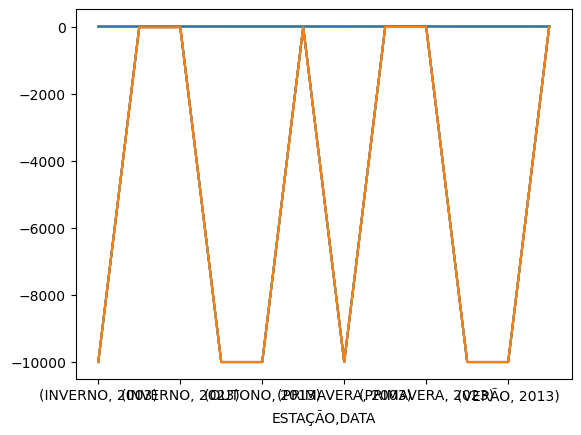

In [64]:
tempPorEst.columns.to_list()
for j in tempPorEst.columns.to_list():
    tempPorEst[j].plot()